In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read out data files & analysis

In [3]:
# later time step
nn = 160
# step interval
dn = 10

filename1=('../data/ptcls_info_t%3.3d.dat')%(nn)
x1,y1,z1,ang1,te1=np.loadtxt(filename1,usecols=[0,1,2,3,4],unpack=True)
filename2=('../data/ptcls_info_t%3.3d.dat')%(nn-dn)
x2,y2,z2,ang2,te2=np.loadtxt(filename2,usecols=[0,1,2,3,4],unpack=True)

omega_bar = 0.542

#r1, r2, ang1, ang2, Ej1, Ej2
if(len(x1) == len(x2)):
    r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
    r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]
    dr = [r1[i] - r2[i] for i in range(len(x1))]
    da = [ang1[i] - ang2[i] for i in range(len(x1))]
    Ej1 = [te1[i] - omega_bar * ang1[i] for i in range(len(x1))]
    Ej2 = [te2[i] - omega_bar * ang2[i] for i in range(len(x2))]
    dEj = [Ej1[i] - Ej2[i] for i in range(len(x1))]
else:
    print('error: NOT equal size!')

1.Angular momentum vs. R
----

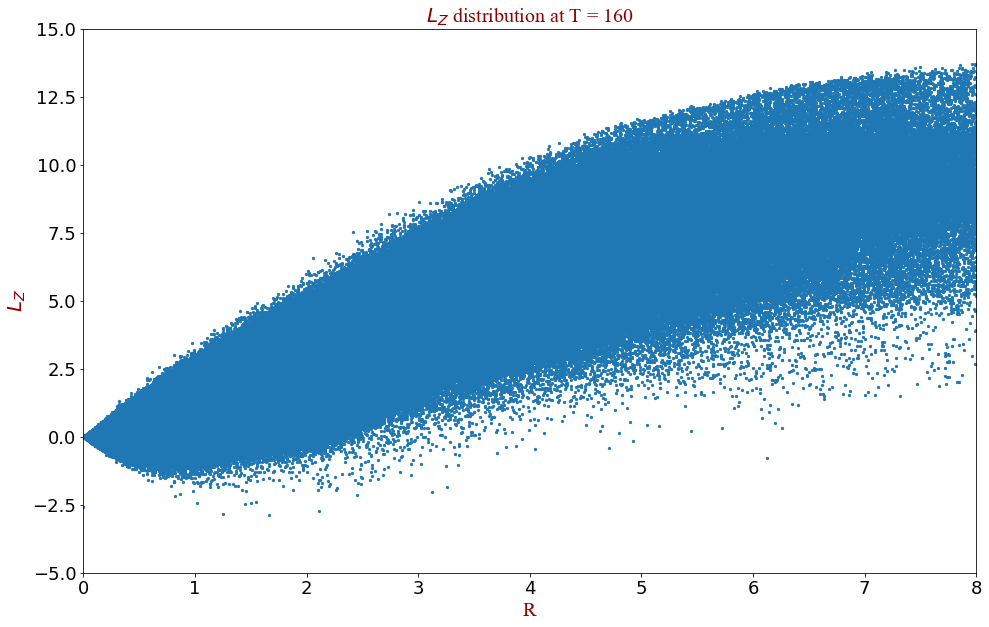

In [4]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, ang1, s=5)

ax = plt.gca()
ax.set_xlim(0,8)
ax.set_ylim(-5,15)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$L_{Z}$',fontdict=font)

#title
titleStr='$L_{Z}$ distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/Lz_R_t'+str(nn)+'.png'
plt.savefig(figname1)

2.Total Energy vs. R
----

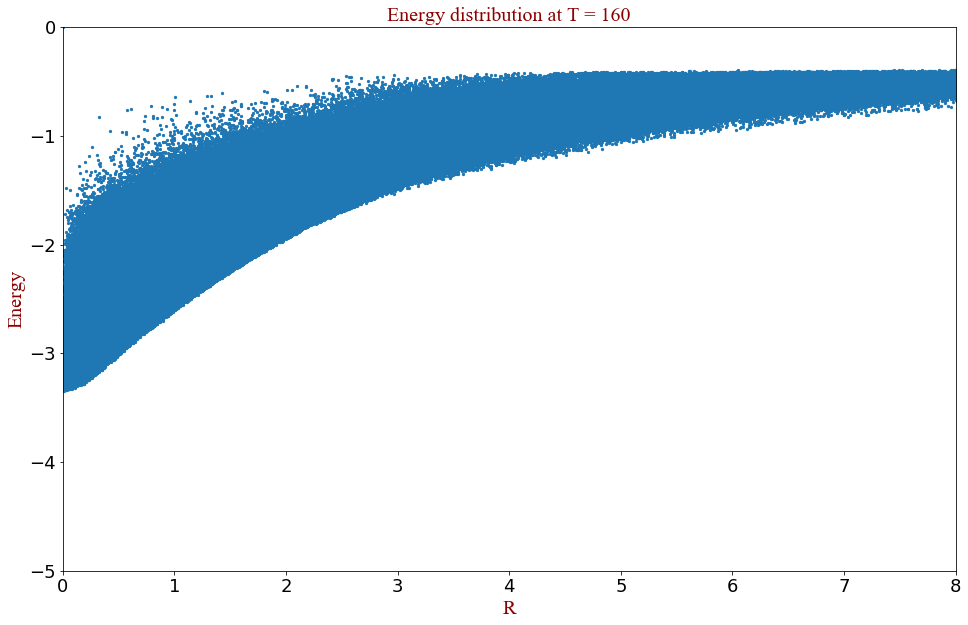

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, te1, s=5)

ax = plt.gca()
ax.set_xlim(0,8)
ax.set_ylim(-5,0)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('Energy',fontdict=font)

#title
titleStr='Energy distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname2='./output/Te_R_t'+str(nn)+'.png'
plt.savefig(figname2)

3.Ej vs. R
----

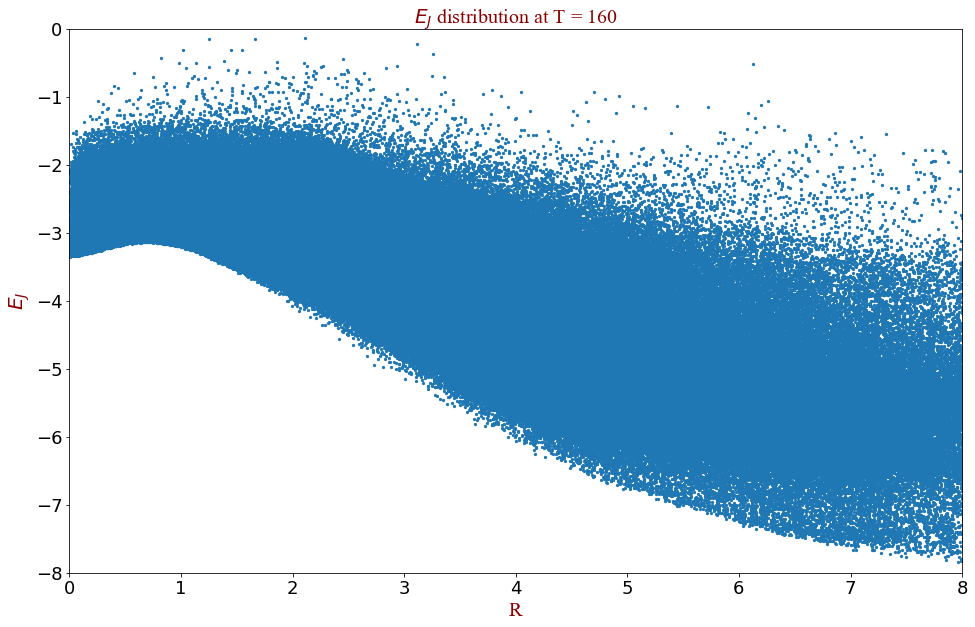

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, Ej1, s=5)

ax = plt.gca()
ax.set_xlim(0,8)
ax.set_ylim(-8,0)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$E_{J}$',fontdict=font)

#title
titleStr='$E_{J}$ distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname3='./output/Ej_R_t'+str(nn)+'.png'
plt.savefig(figname3)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


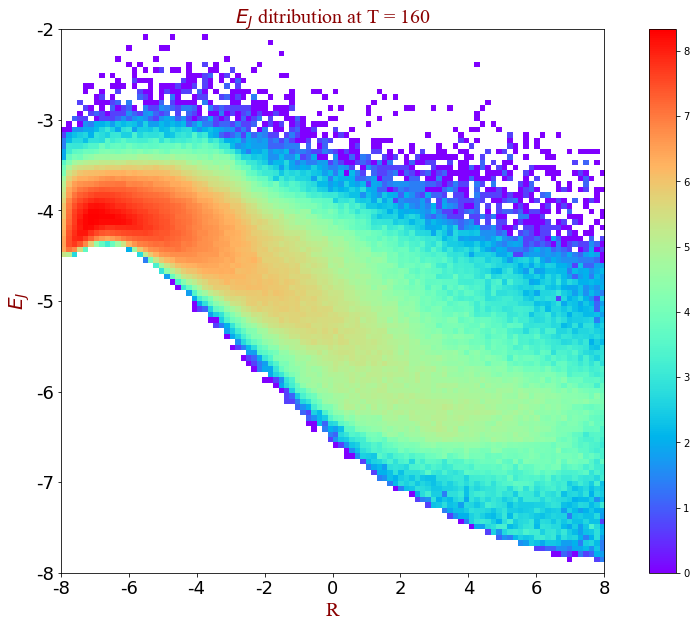

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(Ej1,r1,bins=(100,100),range=([-8,0],[0,8]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8','-6','-4','-2','0','2','4','6','8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-8', '-7', '-6', '-5', '-4', '-3',  '-2',  '-1', '0'))

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)

#title
titleStr='$E_{J}$ ditribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname4='./output/Ej_R_t'+str(nn)+'_color.png'
plt.savefig(figname4)

4.change of the Jacobi Energy
----

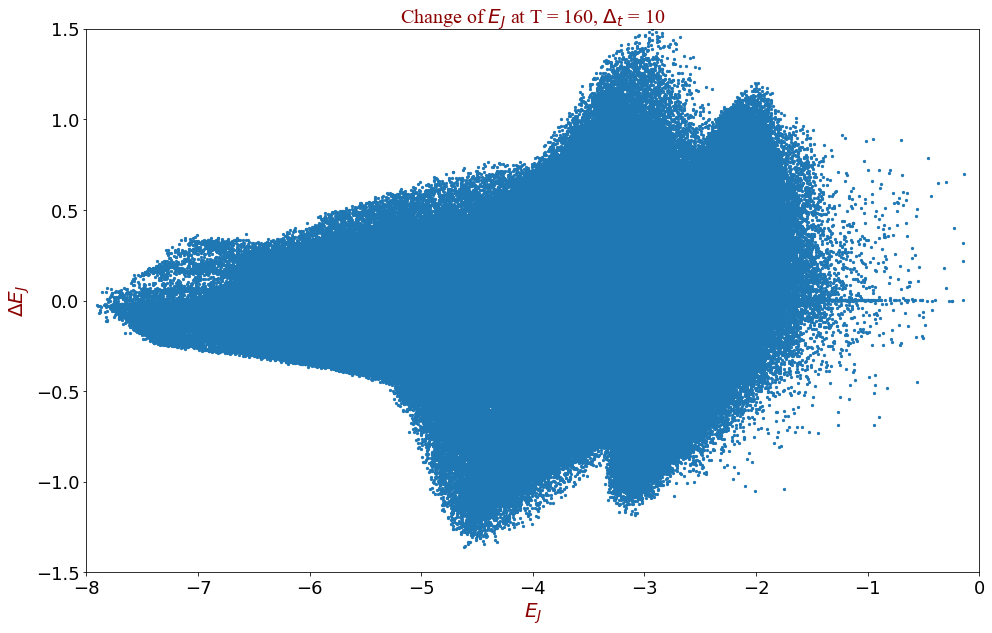

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(Ej1,dEj,s=5)

ax = plt.gca()
ax.set_xlim(-8,0)
ax.set_ylim(-1.5,1.5)

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#title
titleStr='Change of $E_{J}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname5='./output/dEj_t'+str(nn)+'.png'
plt.savefig(figname5)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


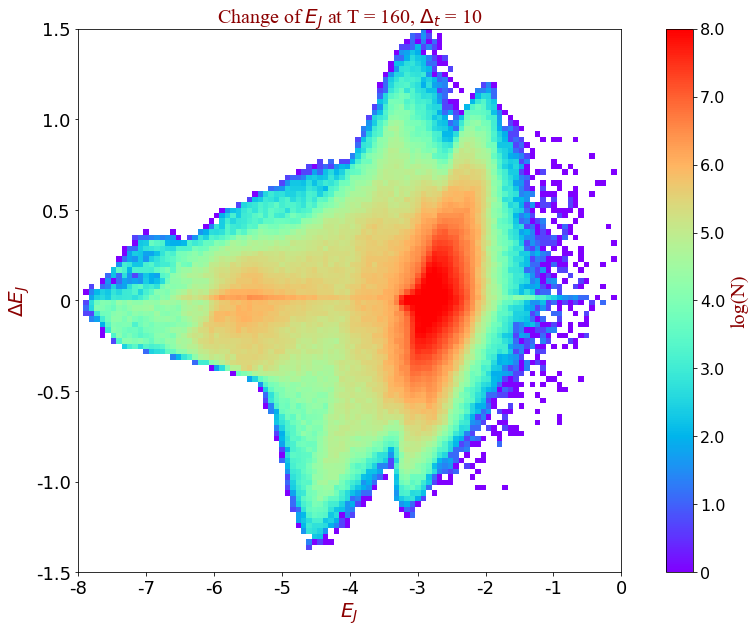

In [9]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej1,bins=(100,100),range=([-1.5,1.5],[-8,0]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-7', '-6', '-5', '-4', '-3',  '-2',  '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-1.5', '-1.0', '-0.5', '0',  '0.5',  '1.0',  '1.5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $E_{J}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname6='./output/dEj_t'+str(nn)+'_color.png'
plt.savefig(figname6)

5.change of angular momentum
----

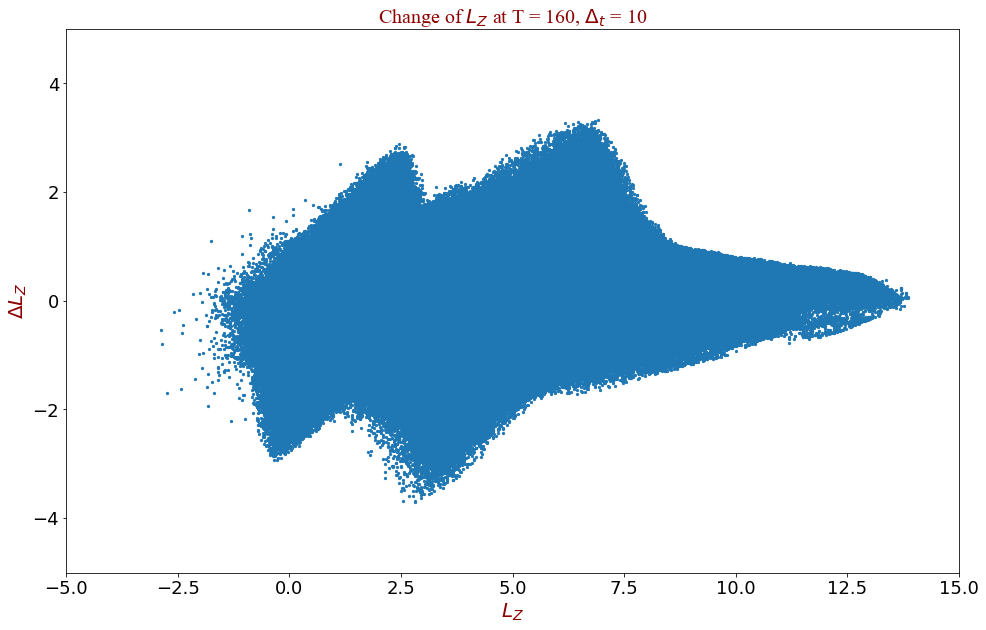

In [10]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(ang1,da,s=5)

ax = plt.gca()
ax.set_xlim(-2.5,15)
ax.set_ylim(-5.,5.)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname7='./output/da_t'+str(nn)+'.png'
plt.savefig(figname7)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


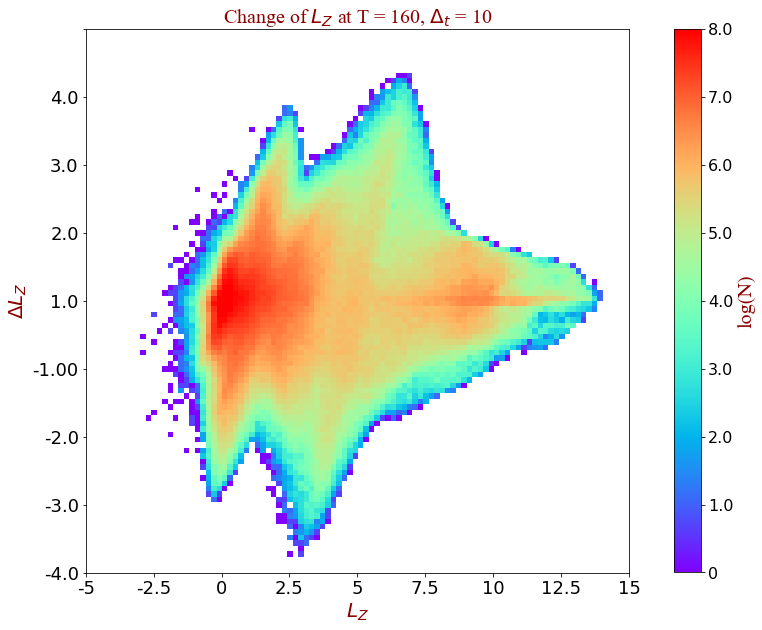

In [11]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang1,bins=(100,100),range=([-4.,4.],[-2.5,15]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,8))
ax.set_xticklabels( ('-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0' '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $L_{Z}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname8='./output/da_t'+str(nn)+'_color.png'
plt.savefig(figname8)